(In order to load the stylesheet of this notebook, execute the last code cell in this notebook)

# Yelp Reviews and Clustering

In this assignment, we will be working with the [Yelp dataset](http://cs-people.bu.edu/kzhao/teaching/yelp_dataset_challenge_academic_dataset.tar). You can find the format of the dataset [here](https://www.yelp.com/dataset_challenge).

First, we will look at Review Objects and perform some [sentiment analysis](http://sentiment.christopherpotts.net/) on the review text.

You will need to preprocess the text using a stemming algorithm. The Porter stemming algorithm is a well-known one. Then, use a lexicon to assign a score to a review based on the positive/negative words you find in the text. You can find various lexicons [here](http://sentiment.christopherpotts.net/lexicons.html).

After you have assigned scores to the reviews based on the text analysis, compare your scores with the stars associated with the reviews. **(20 pts)**

In [98]:
import json
import numpy as np 
from nltk.stem import *
import string 
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

path = "/Users/ALaw/Desktop/Stuff/2016 Spring/591/submissions/591-hw/hw2-submission/yelp_dataset_challenge_academic_dataset/"
filename = path + "yelp_academic_dataset_review.json"

#Read through the Vader lexicon, put them into global dictionary "Vwords"
lexicons = open("/Users/ALaw/Desktop/Stuff/2016 Spring/591/submissions/591-hw/hw2-submission/vader_lexicon.txt",'r')
Vwords = dict()
for line in lexicons:
    line = line.split('\t')
    Vwords[line[0]] = [float(line[1]),float(line[2])]
lexicons.close()

#Sentiment scoring function
def sentiment_score(line):
    '''reads a string and runs a stemmer to break down words to evaluate sentimental score'''
    length = len(line)*1.0
    line = line.lower()
    line = line.strip(string.punctuation)
    line = line.split()
    raw = 0.0
    numV = 1.0
    for i in line:
        if i in Vwords:
            raw += Vwords[i][0] 
            numV += 1.0
            
    if length == 0:
        print(line)
    
    return raw * (numV/length)


#Parse function
def parse(fn=filename):
    '''Read line by line and extract (x,y) coordinates, where x = sentiment intensity and y = star rating'''
    
    data= []
    
    with open(fn,'r') as f:
        for line in f:
            json_line = json.loads(line)
            scores = sentiment_score(json_line['text'])
            stars = json_line['stars']
            data.append((stars,scores))
    
    data = pd.DataFrame(data,columns = ['stars','sentiment'])
    data = data.sort_values('sentiment')
    data = data.drop(data.index[[0,1]])
    data = data.drop(data.index[[2225209,2225210]])
    data = data.sort_values('stars')
    data.to_csv('review_data.csv')
    return data

#test case for parse + sentiment scoring, drops outlier cases
start = time.time()
d = parse()
end = time.time() - start
print("Completed, Time: " + str(end))

Completed, Time: 106.201692104


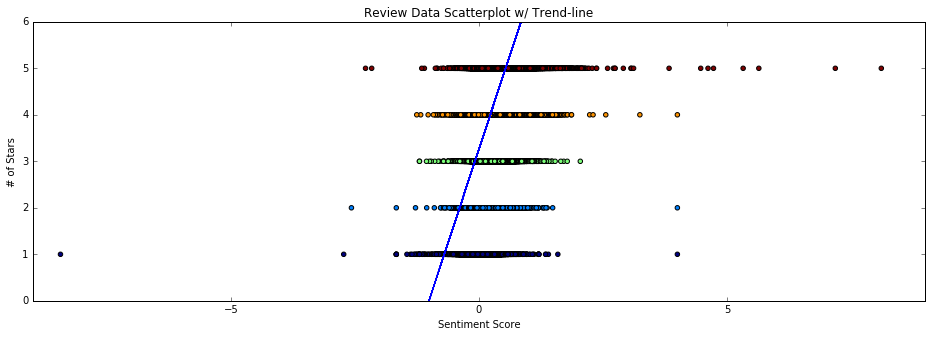

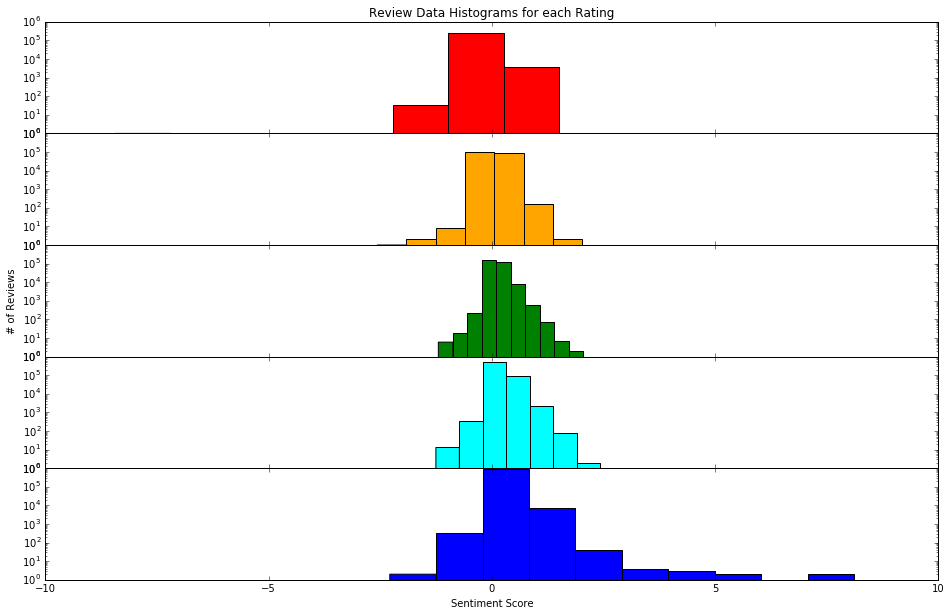

Statistics for data:

# of 1 Star Reviews: 260491
Avg Sentiment of Reviews: 0.00653886895422
Variance of Sentiment: 0.0104978961361

# of 2 Star Reviews: 190047
Avg Sentiment of Reviews: 0.0692810569514
Variance of Sentiment: 0.0114445732897

# of 3 Star Reviews: 282115
Avg Sentiment of Reviews: 0.121118894836
Variance of Sentiment: 0.0166858752912

# of 4 Star Reviews: 591618
Avg Sentiment of Reviews: 0.178268423107
Variance of Sentiment:0.0246182247143

# of 5 Star Reviews: 900938
Avg Sentiment of Reviews: 0.204185523779
Variance of Sentiment: 0.0310080205299

Line of Regression: Y = 3.237147 * X + (3.2637)
		    Y = Star rating X = Sentiment score


In [102]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

path = "/Users/ALaw/Desktop/Stuff/2016 Spring/591/submissions/591-hw/hw2-submission/"
dataname = path + "review_data.csv"

try:
    data = pd.DataFrame.from_csv(dataname)
except IOError:
    data = parse()

def visualize(data):
    '''Visualizes the sentiment vs star rating data through a scatter plot and runs linear regression'''
    
    x = np.array(data['sentiment'])
    y = np.array(data['stars'])
    
    plt.figure(figsize=(16,5))
    plt.scatter(x, y, c = y)
    plt.title('Review Data Scatterplot w/ Trend-line')
    plt.ylabel('# of Stars')
    plt.xlabel('Sentiment Score') 
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x))
    plt.xlim([-9,9])
    plt.ylim([0,6])
    plt.show()

    s1_data = list(data[(data['stars'] == 1)]['sentiment'])
    s2_data = list(data[(data['stars'] == 2)]['sentiment'])
    s3_data = list(data[(data['stars'] == 3)]['sentiment'])
    s4_data = list(data[(data['stars'] == 4)]['sentiment'])
    s5_data = list(data[(data['stars'] == 5)]['sentiment'])
     
    f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True, sharey=True,figsize=(16,10))
    ax1.hist(s1_data, color = 'red')
    ax1.set_title('Review Data Histograms for each Rating')
    ax1.set_yscale('log')
    ax2.hist(s2_data, color = 'orange')
    ax2.set_yscale('log')
    ax3.hist(s3_data, color = 'green')
    ax3.set_ylabel('# of Reviews')
    ax3.set_yscale('log')
    ax4.hist(s4_data, color = 'cyan')
    ax4.set_yscale('log')
    ax5.hist(s5_data)
    ax5.set_xlabel('Sentiment Score')
    ax5.set_yscale('log')
    f.subplots_adjust(hspace=0)
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
    plt.show()
    
    print("Statistics for data:\n")
    print("# of 1 Star Reviews: " + str(len(s1_data)))
    print("Avg Sentiment of Reviews: "+ str(np.mean(s1_data)))
    print("Variance of Sentiment: "+ str(np.var(s1_data)))
    print("")
    print("# of 2 Star Reviews: " + str(len(s2_data)))
    print("Avg Sentiment of Reviews: "+ str(np.mean(s2_data)))
    print("Variance of Sentiment: "+ str(np.var(s2_data)))
    print("")
    print("# of 3 Star Reviews: " + str(len(s3_data)))
    print("Avg Sentiment of Reviews: "+ str(np.mean(s3_data)))
    print("Variance of Sentiment: "+ str(np.var(s3_data)))
    print("")
    print("# of 4 Star Reviews: " + str(len(s4_data)))
    print("Avg Sentiment of Reviews: "+ str(np.mean(s4_data)))
    print("Variance of Sentiment:"+ str(np.var(s4_data)))
    print("")
    print("# of 5 Star Reviews: " + str(len(s5_data)))
    print("Avg Sentiment of Reviews: "+ str(np.mean(s5_data)))
    print("Variance of Sentiment: "+ str(np.var(s5_data)))
    print("")
    print("Line of Regression: Y = %4f * X + (%.4f)\n\t\t    Y = Star rating X = Sentiment score"%(z[0],z[1]))
    
visualize(data)


Visualization and short (detailed) analysis. **(10 pts)**


"723985 - Rude rude rude Rude rude rude Rude rude rude Rude rude rude Rude rude rude Rude rude rude Rude rude rude Rude rude rude Rude rude rude Rude rude rude Rude rude rude Rude rude rude Rude rude rude Rude rude rude Rude rude rude Rude rude rude Rude rude rude Rude rude rude Rude rude rude Rude rude rude Rude rude rude Rude rude rude Rude rude rude Rude rude rude",
"1019106 - bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad"
"1882507 - Love love love love love love love love love love love love love love love love love love love love love"
"915634 - Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing Amazing need I say more"


-----------------

Now, let's look at Business Objects. Try to find culinary districts in Las Vegas. These are characterized by closeness and similarity of restaurants. Use the "longitude" and "latitude" to cluster closeness. Use "categories" and "attributes" to cluster for similarity.

Find clusters using the 3 different techniques we discussed in class: k-means++, hierarchical, and GMM. Explain your data representation and how you determined certain parameters (for example, the number of clusters in k-means++). **(30 pts)**

Things you may want to consider:
1. The spatial coordinates and restaurant categories/attributes have different units of scale. Your results could be arbitrarily skewed if you don't incorporate some scaling.
2. Some restaurant types are inherently more common than others. For example, there are probably lots of "pizza" restaurants. You may want to normalize your vectors so that you don't end up with only clusters of "pizza" restaurants.

Visualize your clusters using each technique. Label your clusters. **(10 pts)**

Now let's detect outliers. These are the ones who are the farthest from the centroids of their clusters. Track them down and describe any interesting observations that you can make. **(10 pts)**

Give a short (detailed) analysis comparing the 3 techniques. **(10 pts)**

-----------------

In [ ]:
# Code for setting the style of the notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("../theme/custom.css", "r").read()
    return HTML(styles)
css_styling()